# Create the Decision Tree Classifier and Visualize it Graphically using "IRIS" Dataset (Task-6) 


## Author - Kedar Joshi

## Importing Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
sns.set()

## Loading Data

In [22]:
df = pd.read_csv(r"C:\Users\kedar\OneDrive\Documents\Iris.csv")
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## Mapping Species to Numerical Values

In [23]:
cat_species = {
    "Iris-setosa" : 0,
    "Iris-versicolor" : 1,
    "Iris-virginica" : 2
}

## Mapping Species in the DataFrame

In [24]:
df['Species'] = df['Species'].map(cat_species)

In [25]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


## Displaying Species Distribution

In [26]:
print(df['Species'].value_counts())

0    50
1    50
2    50
Name: Species, dtype: int64


## Extracting Feature and Target Variables

In [27]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [28]:

print(X[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [29]:
print(y[:10])

[0 0 0 0 0 0 0 0 0 0]


## Splitting Data into Training and Testing Sets

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Creating and Training a Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'gini')
clf = dtc.fit(X_train, y_train)
print(clf)

DecisionTreeClassifier()


In [32]:
print(dtc.predict([[5.9, 3.0, 5.1, 1.8]]))

[2]


# Making Predictions on Test Data

In [33]:
y_pred = dtc.predict(X_test)
print(y_pred)

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2]


## Visualizing the Decision Tree

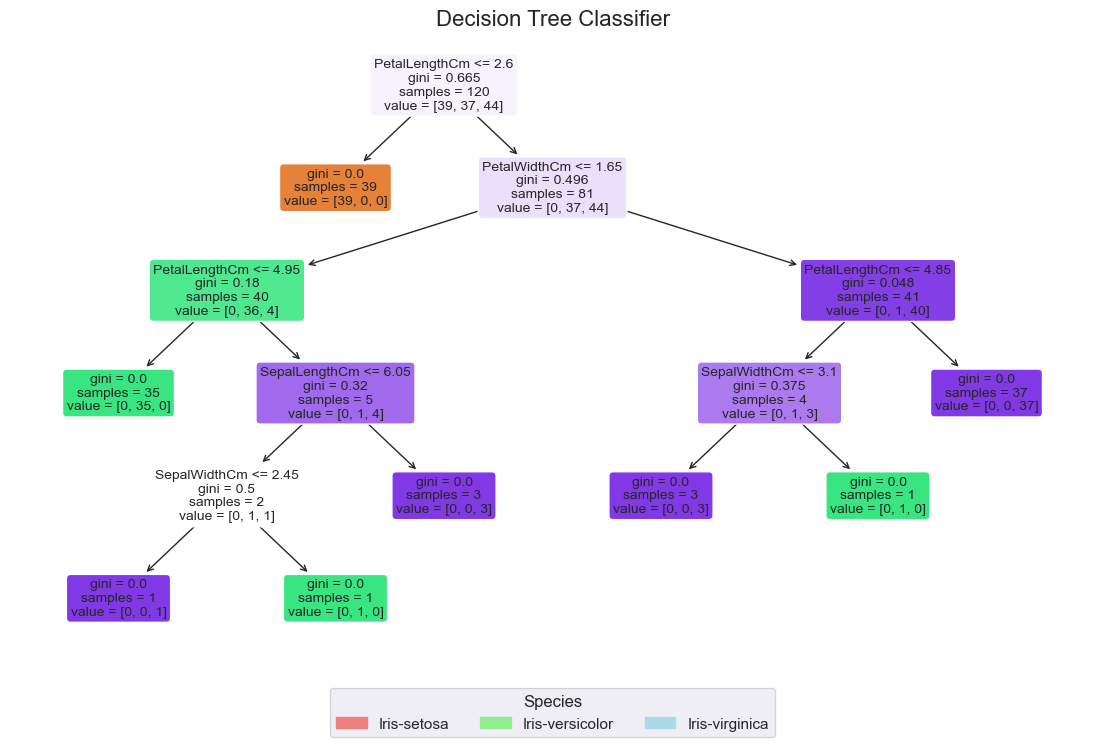

In [38]:
import matplotlib.patches as mpatches

plt.figure(figsize=(14, 8))
tree.plot_tree(clf, filled=True, feature_names=df.columns[1:-1], rounded=True, fontsize=10)

legend_labels = {0: "Iris-setosa", 1: "Iris-versicolor", 2: "Iris-virginica"}

legend_patches = [mpatches.Patch(color='lightcoral', label='Iris-setosa'),
                  mpatches.Patch(color='lightgreen', label='Iris-versicolor'),

plt.legend(handles=legend_patches, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, title='Species')

plt.title("Decision Tree Classifier", fontsize=16)

# Display the plot
plt.show()


## Calculating the accuracy of the model

In [35]:

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print()
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

0.9666666666666667
